# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[0. 1. 0. 0.]


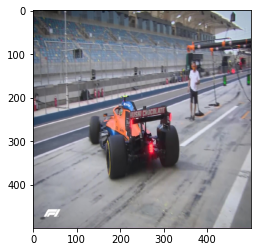

(2, 500, 500, 3)
[0. 0. 1. 0.]


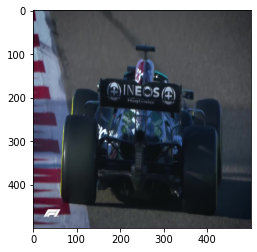

(2, 500, 500, 3)
[0. 0. 0. 1.]


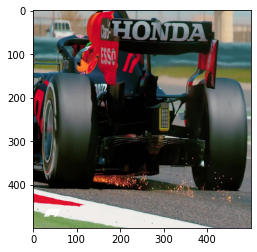

(2, 500, 500, 3)
[0. 1. 0. 0.]


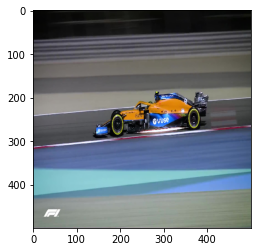

(2, 500, 500, 3)
[0. 0. 0. 1.]


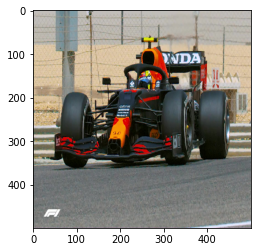

In [2]:
import matplotlib.pyplot as plt

for _ in range(5):
    img,label=test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

# Kütüphaneler

In [ ]:
import numpy as np
import pylab as pl
import tensorflow as tf
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [4]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 496, 4)       304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 248, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 16)      528       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 16)       0

# Model Eğitimi

In [6]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(optimizer=optimizer,loss=loss,metrics=[" accuracy"])

In [8]:
result=model.fit(train_datagen,epochs=5,verbose=1,validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 34s 263ms/step - loss: 1.4071 - mse: 0.1810 - accuracy: 0.4444 - val_loss: 1.5293 - val_mse: 0.1947 - val_accuracy: 0.3929
Epoch 2/5
126/126 [==============================] - 41s 327ms/step - loss: 0.4809 - mse: 0.0626 - accuracy: 0.8611 - val_loss: 1.2652 - val_mse: 0.1688 - val_accuracy: 0.5714
Epoch 3/5
126/126 [==============================] - 40s 317ms/step - loss: 0.1225 - mse: 0.0121 - accuracy: 0.9762 - val_loss: 1.9697 - val_mse: 0.2158 - val_accuracy: 0.4643
Epoch 4/5
126/126 [==============================] - 43s 340ms/step - loss: 0.0338 - mse: 0.0019 - accuracy: 0.9960 - val_loss: 1.8271 - val_mse: 0.2196 - val_accuracy: 0.4643
Epoch 5/5
126/126 [==============================] - 58s 459ms/step - loss: 0.0112 - mse: 1.6206e-04 - accuracy: 1.0000 - val_loss: 1.7626 - val_mse: 0.1963 - val_accuracy: 0.4643


In [10]:
model.save("tflite")

INFO:tensorflow:Assets written to: tflite\assets


In [13]:
model_tf=tf.lite.TFLiteConverter.from_saved_model("tflite")

In [14]:
tf_model = model_tf.convert()

In [15]:
with open('model.tflite', 'wb') as f:
  f.write(tf_model)

In [12]:
model_tf